In [8]:
import gensim
import numpy as np
import nltk as nltk
from gensim.models import Word2Vec 
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import sent_tokenize,word_tokenize
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
def cleanText(text):
    k= [word.lower() for word in word_tokenize(text) if word.isalpha()]
    return(k)


In [9]:
newsGroup = fetch_20newsgroups(subset='all')

Fetched 20-newsGroup dataset

In [10]:
goodSentences = []
for i in newsGroup.data :
    goodSentences.append(cleanText(i))
goodSentences[0]

['from',
 'mamatha',
 'devineni',
 'ratnam',
 'subject',
 'pens',
 'fans',
 'reactions',
 'organization',
 'post',
 'office',
 'carnegie',
 'mellon',
 'pittsburgh',
 'pa',
 'lines',
 'i',
 'am',
 'sure',
 'some',
 'bashers',
 'of',
 'pens',
 'fans',
 'are',
 'pretty',
 'confused',
 'about',
 'the',
 'lack',
 'of',
 'any',
 'kind',
 'of',
 'posts',
 'about',
 'the',
 'recent',
 'pens',
 'massacre',
 'of',
 'the',
 'devils',
 'actually',
 'i',
 'am',
 'bit',
 'puzzled',
 'too',
 'and',
 'a',
 'bit',
 'relieved',
 'however',
 'i',
 'am',
 'going',
 'to',
 'put',
 'an',
 'end',
 'to',
 'relief',
 'with',
 'a',
 'bit',
 'of',
 'praise',
 'for',
 'the',
 'pens',
 'man',
 'they',
 'are',
 'killing',
 'those',
 'devils',
 'worse',
 'than',
 'i',
 'thought',
 'jagr',
 'just',
 'showed',
 'you',
 'why',
 'he',
 'is',
 'much',
 'better',
 'than',
 'his',
 'regular',
 'season',
 'stats',
 'he',
 'is',
 'also',
 'a',
 'lot',
 'fo',
 'fun',
 'to',
 'watch',
 'in',
 'the',
 'playoffs',
 'bowman',
 's

Spilted each paragraph into list of words

In [25]:
#skip gram model
model = gensim.models.Word2Vec(goodSentences, min_count = 10, size = 100, window = 5, sg = 1) 
#CBOW model
model2 = gensim.models.Word2Vec(goodSentences,min_count=10,size=100,sg=0,window=5) 

Now each word is represented as Word2Vec
in skipgram and CBOW model

In [27]:
print("Skip-Gram model")
print(model)
print("CBOW Model")
print(model2)

Skip-Gram model
Word2Vec(vocab=21178, size=100, alpha=0.025)
CBOW Model
Word2Vec(vocab=21178, size=100, alpha=0.025)


In [28]:
#skip-gram model
print("Skip-Gram Model")
vocabulary = list(model.wv.vocab) 
print(len(vocabulary))
#CBOW model
print("CBOW Model")
vocabulary2 = list(model2.wv.vocab) 
print(len(vocabulary2))

Skip-Gram Model
21178
CBOW Model
21178


Vocabulary size is 21178

In [29]:
#skip-gram model
print("Skip-Gram Model")
similarWords = model.wv.most_similar('car',topn=20)	
print(similarWords)
#CBOW model
print("CBOW Model")
similarWords = model2.wv.most_similar('car',topn=20)	
print(similarWords)

Skip-Gram Model
[('tires', 0.7857781648635864), ('bicycle', 0.7612311840057373), ('camry', 0.7510456442832947), ('sentra', 0.7485638856887817), ('toyota', 0.746119499206543), ('civic', 0.7442732453346252), ('taurus', 0.7342429161071777), ('corvette', 0.7339216470718384), ('nissan', 0.7287704944610596), ('audi', 0.7287688255310059), ('subaru', 0.7206991910934448), ('saab', 0.7153974175453186), ('sporty', 0.7153868675231934), ('tire', 0.7150723934173584), ('svx', 0.7148271799087524), ('accord', 0.7140721082687378), ('celica', 0.711061954498291), ('mazda', 0.7108465433120728), ('motorcycle', 0.7032800912857056), ('honda', 0.7031876444816589)]
CBOW Model
[('bike', 0.7799072861671448), ('tires', 0.7193182706832886), ('helmet', 0.6894192695617676), ('engine', 0.6796683073043823), ('seat', 0.6601468324661255), ('dealer', 0.6577131748199463), ('passenger', 0.6498311758041382), ('truck', 0.6434078216552734), ('honda', 0.6366091370582581), ('motorcycle', 0.627327024936676), ('driving', 0.6179678

Above are the top 20 similar words for car

In [30]:
print("Skip-Gram Model :")
result = model.wv.most_similar(positive=['girl', 'father'], negative=['boy'] ,topn=5 )
print(result)
print("CBOW Model :")
result = model.wv.most_similar(positive=['sports', 'ball'], negative=['bat'] ,topn=5 )
print(result)

Skip-Gram Model :
[('son', 0.6729869842529297), ('womb', 0.6624008417129517), ('hast', 0.6607785224914551), ('bayonet', 0.6478488445281982), ('elohim', 0.6466984152793884)]
CBOW Model :
[('golf', 0.5655436515808105), ('televised', 0.5317667722702026), ('telecast', 0.5260354280471802), ('football', 0.5230066776275635), ('umps', 0.5203878879547119)]


Above are the top 5 similar words for girl + father - boy
Above are the top 5 similar words for sports - bat + ball

In [32]:
pltWord=['baseball','software','police', 'government', 'circuit', 'car']
X = np.zeros((120,100))
i=0
for word in pltWord:
    similarWords =  model.wv.most_similar(word,topn=20)
    for simWord in similarWords :
        X[i]=model[simWord[0]]
        i=i+1

    
X2 = np.zeros((120,100))
i=0
for word in pltWord:
    similarWords =  model2.wv.most_similar(word,topn=20)
    for simWord in similarWords:
        X2[i]=model2[simWord[0]]
        i=i+1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [33]:
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)
tsne = TSNE(n_components=2, random_state=0)
X2_2d = tsne.fit_transform(X2)

Skip Gram Model :
CBOW Model :


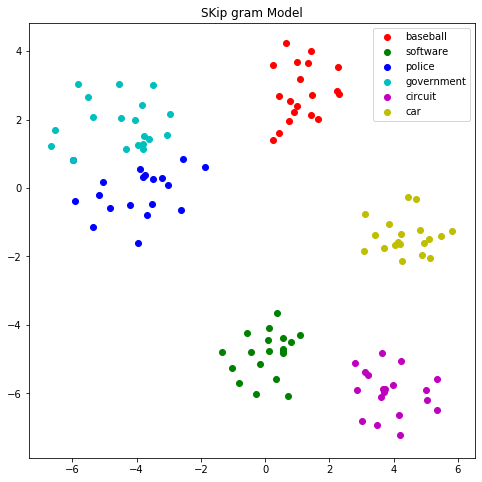

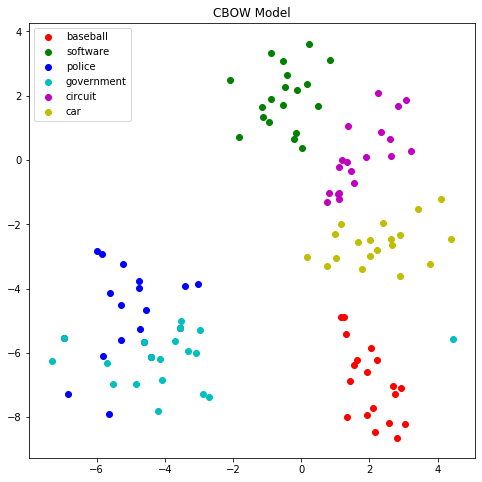

In [37]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']
labels=['baseball','software','police', 'government', 'circuit', 'car']

plt.figure(figsize=(8,8))
print("Skip Gram Model :")
plt.title("SKip gram Model")
for i in range(0,6):
    c =colors[i]
    x= X_2d[20*i:20*(i+1)-1,0]
    y= X_2d[20*i:20*(i+1)-1,1]
    plt.scatter(x,y,c=c,label=labels[i])
plt.legend()

plt.figure(figsize=(8,8))
print("CBOW Model :")
plt.title("CBOW Model")
for i in range(0,6):
    c =colors[i]
    x= X2_2d[20*i:20*(i+1)-1,0]
    y= X2_2d[20*i:20*(i+1)-1,1]
    plt.scatter(x,y,c=c,label=labels[i])
plt.legend()
    
  

In [38]:
import tensorflow as tf 
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU

In [39]:
vectorData = np.zeros((len(goodSentences),100))
i=0
j=0
for paragraph in goodSentences:
    x = np.zeros((100)) 
    j = 0 
    for word in paragraph :
        if word in model.wv :
            x = x + model.wv[word] 
            j = j + 1 
    vectorData[i] = x / j 
    i = i + 1 
    
vectorData2 = np.zeros((len(goodSentences),100))
i=0
j=0
for paragraph in goodSentences:
    x = np.zeros((100)) 
    j = 0 
    for word in paragraph :
        if word in model2.wv :
            x = x + model2.wv[word] 
            j = j + 1 
    vectorData2[i] = x / j 
    i = i + 1
vectorData = tf.keras.utils.normalize(vectorData)
outputData = list(newsGroup.target)

vectorData2 = tf.keras.utils.normalize(vectorData2)
outputData2 = list(newsGroup.target)

In [55]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=(100,)))
model1.add(tf.keras.layers.Dense(100,activation = tf.nn.tanh))
model1.add(tf.keras.layers.Dense(100,activation = tf.nn.leaky_relu))
model1.add(tf.keras.layers.Dense(20,activation = tf.nn.softmax ))

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Flatten(input_shape=(100,)))
model3.add(tf.keras.layers.Dense(100,activation = tf.nn.tanh))
model3.add(tf.keras.layers.Dense(100,activation = tf.nn.leaky_relu))
model3.add(tf.keras.layers.Dense(20,activation = tf.nn.softmax ))

In [49]:
x_testData = vectorData[:int(0.2*len(vectorData))]
y_testData = outputData[:int(0.2*len(outputData))]
x_trainData = vectorData[int(0.2*len(vectorData)):]
y_trainData = outputData[int(0.2*len(outputData)):]

x_testData1 = vectorData2[:int(0.2*len(vectorData))]
y_testData1 = outputData2[:int(0.2*len(outputData))]
x_trainData1 = vectorData2[int(0.2*len(vectorData)):]
y_trainData1 = outputData2[int(0.2*len(outputData)):]


y_trainData = np.array(y_trainData)
y_trainData1 = np.array(y_trainData1)
y_testData = np.array(y_testData)
y_testData1 = np.array(y_testData1)

In [56]:
model1.compile(optimizer='adam',
               loss= tf.keras.losses.sparse_categorical_crossentropy
               , metrics=['accuracy'])
model3.compile(optimizer='adam',
               loss= tf.keras.losses.sparse_categorical_crossentropy
               , metrics=['accuracy'])

In [80]:
model1.fit(x_trainData,y_trainData,epochs=100,shuffle=True,validation_split=0.1)

Train on 13569 samples, validate on 1508 samples
Epoch 1/100
13569/13569 [==============================] - 1s 66us/sample - loss: 0.7305 - acc: 0.7558 - val_loss: 0.7213 - val_acc: 0.7540
Epoch 2/100
13569/13569 [==============================] - 1s 65us/sample - loss: 0.7156 - acc: 0.7584 - val_loss: 0.7366 - val_acc: 0.7447
Epoch 3/100
13569/13569 [==============================] - 1s 65us/sample - loss: 0.7047 - acc: 0.7663 - val_loss: 0.7311 - val_acc: 0.7566
Epoch 4/100
13569/13569 [==============================] - 1s 66us/sample - loss: 0.6943 - acc: 0.7691 - val_loss: 0.7284 - val_acc: 0.7520
Epoch 5/100
13569/13569 [==============================] - 1s 65us/sample - loss: 0.6855 - acc: 0.7689 - val_loss: 0.7050 - val_acc: 0.7626
Epoch 6/100
13569/13569 [==============================] - 1s 65us/sample - loss: 0.6771 - acc: 0.7733 - val_loss: 0.7208 - val_acc: 0.7659
Epoch 7/100
13569/13569 [==============================] - 1s 65us/sample - loss: 0.6713 - acc: 0.7745 - val_lo

Epoch 59/100
13569/13569 [==============================] - 1s 64us/sample - loss: 0.4876 - acc: 0.8359 - val_loss: 0.6890 - val_acc: 0.7792
Epoch 60/100
13569/13569 [==============================] - 1s 63us/sample - loss: 0.4744 - acc: 0.8398 - val_loss: 0.6836 - val_acc: 0.7725
Epoch 61/100
13569/13569 [==============================] - 1s 65us/sample - loss: 0.4711 - acc: 0.8393 - val_loss: 0.7141 - val_acc: 0.7759
Epoch 62/100
13569/13569 [==============================] - 1s 64us/sample - loss: 0.4701 - acc: 0.8409 - val_loss: 0.6728 - val_acc: 0.7812
Epoch 63/100
13569/13569 [==============================] - 1s 64us/sample - loss: 0.4673 - acc: 0.8381 - val_loss: 0.6805 - val_acc: 0.7792
Epoch 64/100
13569/13569 [==============================] - 0s 31us/sample - loss: 0.4676 - acc: 0.8401 - val_loss: 0.7082 - val_acc: 0.7679
Epoch 65/100
13569/13569 [==============================] - 0s 32us/sample - loss: 0.4663 - acc: 0.8409 - val_loss: 0.6870 - val_acc: 0.7825
Epoch 66/100


In [57]:
model3.fit(x_trainData1,y_trainData1,epochs=100,shuffle=True,validation_split=0.1)

Train on 13569 samples, validate on 1508 samples
Epoch 1/100
13569/13569 [==============================] - 5s 399us/sample - loss: 1.9729 - acc: 0.3684 - val_loss: 1.4813 - val_acc: 0.5080
Epoch 2/100
13569/13569 [==============================] - 5s 340us/sample - loss: 1.3993 - acc: 0.5230 - val_loss: 1.3067 - val_acc: 0.5544
Epoch 3/100
13569/13569 [==============================] - 5s 332us/sample - loss: 1.2887 - acc: 0.5600 - val_loss: 1.2306 - val_acc: 0.5962
Epoch 4/100
13569/13569 [==============================] - 5s 342us/sample - loss: 1.2346 - acc: 0.5815 - val_loss: 1.1965 - val_acc: 0.5975
Epoch 5/100
13569/13569 [==============================] - 5s 336us/sample - loss: 1.1982 - acc: 0.5926 - val_loss: 1.1654 - val_acc: 0.5975
Epoch 6/100
13569/13569 [==============================] - 5s 335us/sample - loss: 1.1664 - acc: 0.6034 - val_loss: 1.1369 - val_acc: 0.6187
Epoch 7/100
13569/13569 [==============================] - 5s 345us/sample - loss: 1.1399 - acc: 0.6090 -

13569/13569 [==============================] - 4s 326us/sample - loss: 0.8062 - acc: 0.7253 - val_loss: 1.0271 - val_acc: 0.6618
Epoch 59/100
13569/13569 [==============================] - 4s 326us/sample - loss: 0.8000 - acc: 0.7243 - val_loss: 1.0335 - val_acc: 0.6572
Epoch 60/100
13569/13569 [==============================] - 4s 327us/sample - loss: 0.8065 - acc: 0.7237 - val_loss: 1.0100 - val_acc: 0.6578
Epoch 61/100
13569/13569 [==============================] - 4s 328us/sample - loss: 0.7896 - acc: 0.7272 - val_loss: 1.0132 - val_acc: 0.6651
Epoch 62/100
13569/13569 [==============================] - 4s 328us/sample - loss: 0.7865 - acc: 0.7331 - val_loss: 1.0362 - val_acc: 0.6618
Epoch 63/100
13569/13569 [==============================] - 4s 326us/sample - loss: 0.7910 - acc: 0.7282 - val_loss: 1.0181 - val_acc: 0.6664
Epoch 64/100
13569/13569 [==============================] - 4s 325us/sample - loss: 0.7843 - acc: 0.7306 - val_loss: 1.0437 - val_acc: 0.6558
Epoch 65/100
13569/

In [81]:
print("Skip Gram Model :")
print("Performance with testData :")
val_loss , val_acc = model1.evaluate(x_testData,y_testData)

Skip Gram Model :
Performance with testData :
3769/3769 [==============================] - 0s 36us/sample - loss: 0.7928 - acc: 0.7583


In [82]:
print("CBOW Model :")
print("Performance with testData :")
val_loss , val_acc = model3.evaluate(x_testData1,y_testData1)

CBOW Model :
Performance with testData :
3769/3769 [==============================] - 0s 33us/sample - loss: 1.1939 - acc: 0.6373


# For 20NewsGroup,
## Skip-Gram Model is the preferred over CBOW model since it has more test accuracy ... 